In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
notebook_dir = Path.cwd()
file_path = notebook_dir.parent / "data" / "speech_data.csv"
df = pd.read_csv(file_path)
df.head(3)

,Name,Unifying Words Count,Polarizing Words Count,Total Words Count,Political Party,Overall Language,Unifying Words Ratio,Polarizing Words Ratio,Overall Ratio
0,Donald J. Trump (2nd Term),21,22,2905,Republican,polarizing,0.00723,0.00757,0.9551
1,"Joseph R. Biden, Jr.",29,11,2532,Democrat,unifying,0.01145,0.00434,2.6382
2,Donald J. Trump (1st Term),10,4,1455,Republican,unifying,0.00687,0.00275,2.4982


In [5]:
# View unique parties
df["Political Party"].value_counts()

Political Party
Republican                   26
Democrat                     24
Democratic-Republican         7
Whig                          2
No formal party               2
Whig (later Unaffiliated)     1
Federalist                    1
Name: count, dtype: int64

# Subset Data 
We will subset only observations with Republican and Democratic presidents for the sake of our analysis. This still leaves us with 50 observations.

In [6]:
# Subset data with Republican or Democratic Presidents
df2 = df[
    (df["Political Party"] == "Republican") | (df["Political Party"] == "Democrat")
].copy()

df2.head()
df2["Political Party"].unique()

array(['Republican', 'Democrat'], dtype=object)

# Descriptive Statistics

In [13]:
print("Five Number Summary: Overall Ratio", "\n",
      df2["Overall Ratio"].describe())

Five Number Summary: Overall Ratio 
 count    50.000000
mean      2.626112
std       2.832520
min       0.000000
25%       1.000000
50%       1.570150
75%       2.761425
max      15.924200
Name: Overall Ratio, dtype: float64


In [11]:
print("Five Number Summary: Unifying Words Count", "\n",
      df2["Unifying Words Count"].describe())

Five Number Summary: Unifying Words Count 
 count    50.000000
mean     13.320000
std       7.675671
min       0.000000
25%       8.000000
50%      13.000000
75%      16.000000
max      36.000000
Name: Unifying Words Count, dtype: float64


In [12]:
print("Five Number Summary: Polarizing Words Count", "\n",
      df2["Polarizing Words Count"].describe())

Five Number Summary: Polarizing Words Count 
 count    50.000000
mean      8.160000
std       6.215057
min       0.000000
25%       3.000000
50%       6.500000
75%      12.000000
max      22.000000
Name: Polarizing Words Count, dtype: float64


# Exploratory Plots

Text(0.5, 1.0, 'Distributions of Overall Ratios of Unifying to Polarizing Language Used')

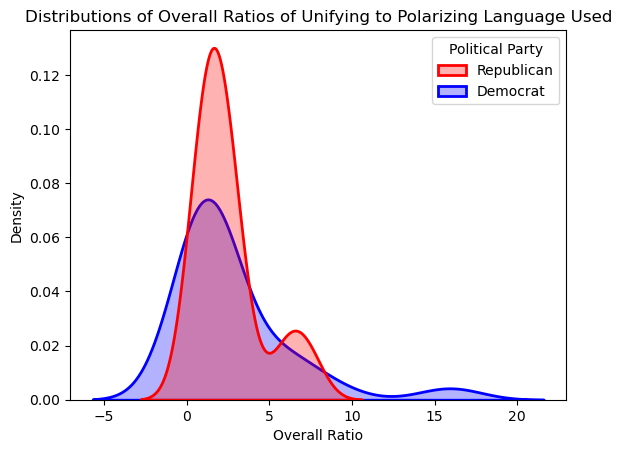

In [5]:
sns.kdeplot(
    data=df2,
    x="Overall Ratio",
    hue="Political Party",
    palette={"Republican": "red", "Democrat": "blue"},
    fill=True,
    alpha=0.3,
    linewidth=2,
)
plt.title("Distributions of Overall Ratios of Unifying to Polarizing Language Used")

Text(0.5, 1.0, 'Average and Individual Overall Ratios by Political Party')

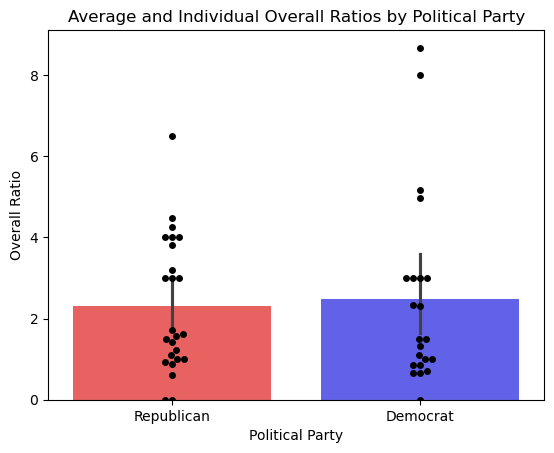

In [52]:
sns.barplot(
    data=df2,
    x="Political Party",
    y="Overall Ratio",
    alpha=0.7,
    hue="Political Party",
    palette={"Republican": "red", "Democrat": "blue"},
)
sns.swarmplot(data=df2, x="Political Party", y="Overall Ratio", color="black")
plt.title("Overall Ratios by Political Party")

Text(0.5, 1.0, 'Unifying vs. Polarizing Words Ratios by Political Party')

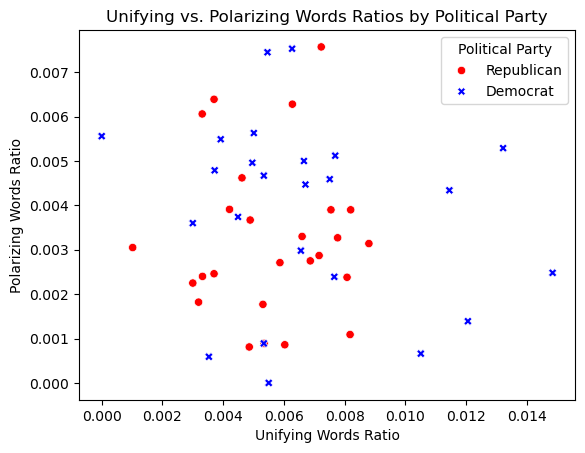

In [11]:
sns.scatterplot(data=df2, x="Unifying Words Ratio", y="Polarizing Words Ratio", 
                hue="Political Party", style="Political Party",
                palette={"Republican": "red", "Democrat": "blue"})
plt.title("Unifying vs. Polarizing Words Ratios by Political Party")

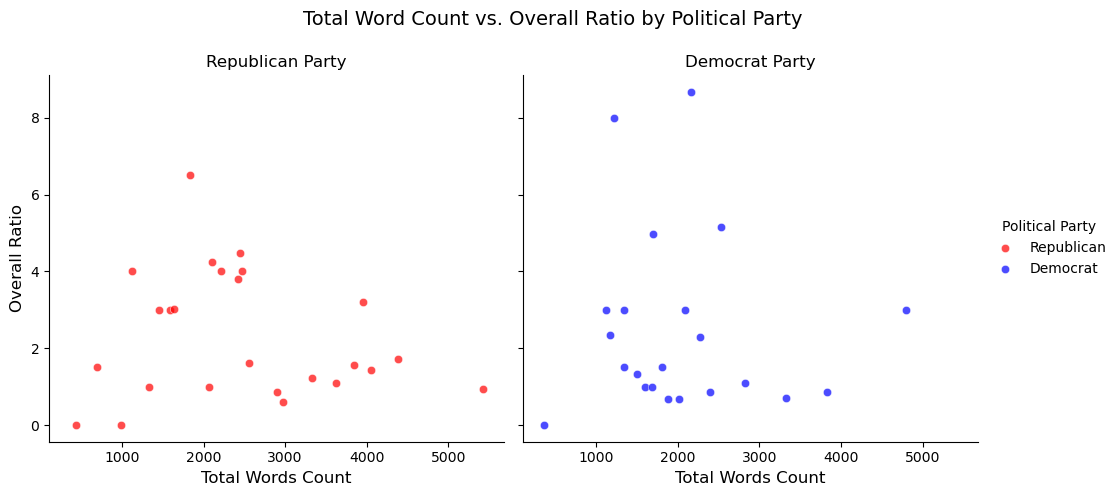

In [67]:
g = sns.FacetGrid(
    df2,
    col="Political Party",
    hue="Political Party",
    palette={"Republican": "red", "Democrat": "blue"},
    height=5,
)
g.map(sns.scatterplot, "Total Words Count", "Overall Ratio", alpha=0.7)
g.set_axis_labels("Total Words Count", "Overall Ratio", size=12)
g.set_titles("{col_name} Party", size=12)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Total Word Count vs. Overall Ratio by Political Party", fontsize=14)
plt.show()